In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

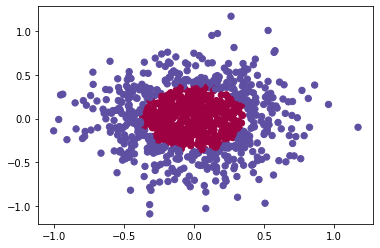

In [50]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2, 
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);

Funciones de activacion

In [32]:
def sigmoid(a, derivate = False):
    if derivate:
        return np.exp(-a)/(( np.exp(-a) +1)**2)
    else:    
        return 1 / (1 + np.exp(-a))

def relu(x, derivate = False):
    if derivate:
      x[x<=0] = 0
      x[x>0] = 1
      return x
    else:
      return np.maximum(0,x)

Funcion de perdida


In [33]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

In [34]:
def initialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0,L-1):
        parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) -1
        parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) -1
    return parameters



In [35]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)

In [36]:
params

{'W1': array([[-0.66306057,  0.71623851,  0.5616404 , -0.16014874],
        [-0.42673825,  0.94199375,  0.03750623, -0.49360236]]),
 'b1': array([[ 0.25258786,  0.22609385, -0.46599728,  0.08373018]]),
 'W2': array([[ 3.90287466e-01,  2.27156326e-01, -4.11135018e-01,
         -9.29352194e-01,  9.01946565e-01,  3.99920631e-02,
          1.78440740e-01,  5.18251420e-01],
        [ 1.12416985e-01,  7.43731375e-01, -1.39269651e-01,
          8.54176342e-01,  7.35896636e-02, -7.08001805e-01,
          7.80194617e-01,  2.95090910e-01],
        [ 5.63722131e-01,  2.59171937e-02,  7.01241080e-01,
         -5.93580134e-01, -9.61340902e-01,  1.70684315e-01,
          1.54142698e-01,  2.80713624e-01],
        [ 3.58367349e-01, -3.37461089e-02,  8.65718842e-04,
          1.69078987e-01,  9.36640455e-01,  3.48139147e-01,
         -6.19568244e-01,  3.54063429e-01]]),
 'b2': array([[ 0.62735247, -0.62383523, -0.39633276, -0.79917511,  0.34775389,
          0.87738346, -0.62288476, -0.21986288]]),
 'W

In [37]:
params['W1'].shape

(2, 4)

In [38]:
X.shape

(1000, 2)

In [39]:
np.matmul(X,params['W1'])
#X@params['W1']

array([[-0.34804019,  0.49350026,  0.21564057, -0.17949439],
       [ 0.39417813, -0.55237114, -0.24863816,  0.19797136],
       [-0.1171692 ,  0.19115499,  0.05574879, -0.08073721],
       ...,
       [-0.0619656 , -0.10199311,  0.16625548,  0.12218067],
       [ 0.35656178, -0.45140483, -0.25740798,  0.13990351],
       [-0.04918891,  0.10050962,  0.00975903, -0.05034331]])

In [40]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

In [51]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(50000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))

0.33827882622026817
0.23990451798807821
0.23536562516827006
0.23113264076575427
0.22601747309604195
0.21999722345898315
0.21389026949183174
0.207597938884392
0.20119074430670902
0.19487994579564372
0.1886425857836899
0.18252581803139692
0.17646489108459554
0.1702901945483319
0.16394628421362115
0.15728399794162903
0.15026160725136628
0.14266715231972357
0.13485445372015145
0.12703730876304228
0.11935877086940273
0.11207159629158217
0.10528032642597566
0.09914960726502786
0.09361113470405993
0.0887432204396853
0.08443538089840831
0.08061836784201241
0.07722404223134158
0.07416527602464905
0.0713885482440958
0.0688728120307854
0.06657062353904729
0.06440714470436099
0.06199943085097716
0.059792478461325696
0.05784919282724089
0.05605413329935601
0.05434411125446124
0.052765547413691126
0.05136119852417175
0.050139520136324264
0.049035937491813494
0.04802543973562187
0.047090916989307514
0.04621104854983123
0.05713133254939798
0.09090745147931216
0.0717425127420238
0.07999712374198617
0.0

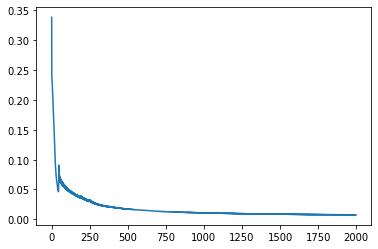

In [52]:
plt.plot(errors)

In [53]:
data_test = (np.random.rand(1000,2)*2) -1
y = train(data_test,0.0001,params, training = False)

In [54]:
y = np.where(y >= 0.5,1,0)

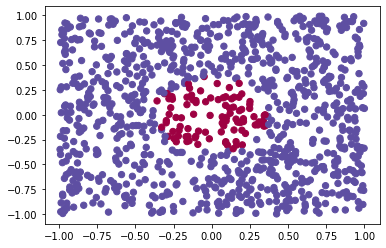

In [57]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral);

In [56]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    